# Análisis de Datos de Videojuegos
Este notebook analiza tendencias, patrones y relaciones en un dataset de videojuegos para responder preguntas de investigación específicas.


## Contexto del Proyecto
La industria de los videojuegos es una de las más importantes en el ámbito del entretenimiento, generando miles de millones de dólares en ventas anuales. Este análisis busca responder preguntas clave como:
1. ¿Qué géneros son más populares por región?
2. ¿Cómo influye la crítica en las ventas de videojuegos?
3. ¿Qué consolas y desarrolladores tienen mayor éxito?
4. ¿Cómo han cambiado las tendencias a lo largo del tiempo?
5. ¿Cuáles son los desarrolladores con mayor impacto en las ventas totales de videojuegos?
6. ¿Cómo varían las ventas promedio de videojuegos según la consola y el género?

Estas preguntas son relevantes para identificar patrones de consumo y apoyar decisiones en la industria del videojuego.


## Objetivos del Proyecto


Los objetivos de este análisis son:
- Explorar tendencias de ventas de videojuegos por región y género.
- Analizar la relación entre puntuaciones críticas y ventas.
- Identificar desarrolladores, editores y consolas con mayores ventas.
- Evaluar cambios en las ventas y popularidad de videojuegos a lo largo del tiempo.


In [ ]:

# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Carga del Dataset y Exploración Inicial

In [ ]:

# Cargar el archivo CSV
file_path = '/content/vgchartz-2024.csv'  # Ruta del archivo
data = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
display(data.head())

# Descripción inicial del dataset
print("Resumen de las columnas:")
print(data.info())

print("\nCantidad de valores nulos por columna:")
print(data.isnull().sum())


Primeras filas del dataset:


,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


Resumen de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377 entries, 0 to 7376
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           7377 non-null   object 
 1   title         7377 non-null   object 
 2   console       7377 non-null   object 
 3   genre         7377 non-null   object 
 4   publisher     7377 non-null   object 
 5   developer     7376 non-null   object 
 6   critic_score  2620 non-null   float64
 7   total_sales   7376 non-null   float64
 8   na_sales      6603 non-null   float64
 9   jp_sales      2646 non-null   float64
 10  pal_sales     6418 non-null   float64
 11  other_sales   6921 non-null   float64
 12  release_date  7365 non-null   object 
 13  last_update   1385 non-null   object 
dtypes: float64(6), object(8)
memory usage: 807.0+ KB
None

Cantidad de valores nulos por columna:
img                0
title              0
console            0
genre             


### Observaciones Iniciales
- El dataset contiene información sobre videojuegos, incluyendo su título, género, consola, puntuaciones críticas, ventas totales y regionales, desarrolladores, y fechas de lanzamiento.
- Algunas columnas tienen valores nulos significativos (ej. `critic_score` y `total_sales`).
- Hay columnas irrelevantes para el análisis, como `img` y `last_update`.


## Limpieza y Transformación de Datos

In [ ]:

# Eliminar columnas irrelevantes
data_filtered = data.drop(columns=['img', 'last_update'])

# Procesar valores nulos: eliminar filas con datos esenciales faltantes
data_cleaned = data_filtered.dropna(subset=['total_sales', 'genre', 'console', 'release_date'])

# Convertir la columna 'release_date' en formato datetime
data_cleaned['release_date'] = pd.to_datetime(data_cleaned['release_date'], errors='coerce')

# Verificar cambios
print("Datos después de la limpieza:")
print(data_cleaned.info())


Datos después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 7365 entries, 0 to 7375
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         7365 non-null   object        
 1   console       7365 non-null   object        
 2   genre         7365 non-null   object        
 3   publisher     7365 non-null   object        
 4   developer     7365 non-null   object        
 5   critic_score  2620 non-null   float64       
 6   total_sales   7365 non-null   float64       
 7   na_sales      6598 non-null   float64       
 8   jp_sales      2639 non-null   float64       
 9   pal_sales     6411 non-null   float64       
 10  other_sales   6912 non-null   float64       
 11  release_date  7365 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 748.0+ KB
None


<ipython-input-5-8592d70c9ad1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['release_date'] = pd.to_datetime(data_cleaned['release_date'], errors='coerce')



## Exploración y Visualización de Datos
A continuación, analizaremos el dataset para responder las preguntas de investigación planteadas.


### Pregunta 1: ¿Qué géneros de videojuegos han sido los más vendidos por región?

<Figure size 1200x600 with 0 Axes>

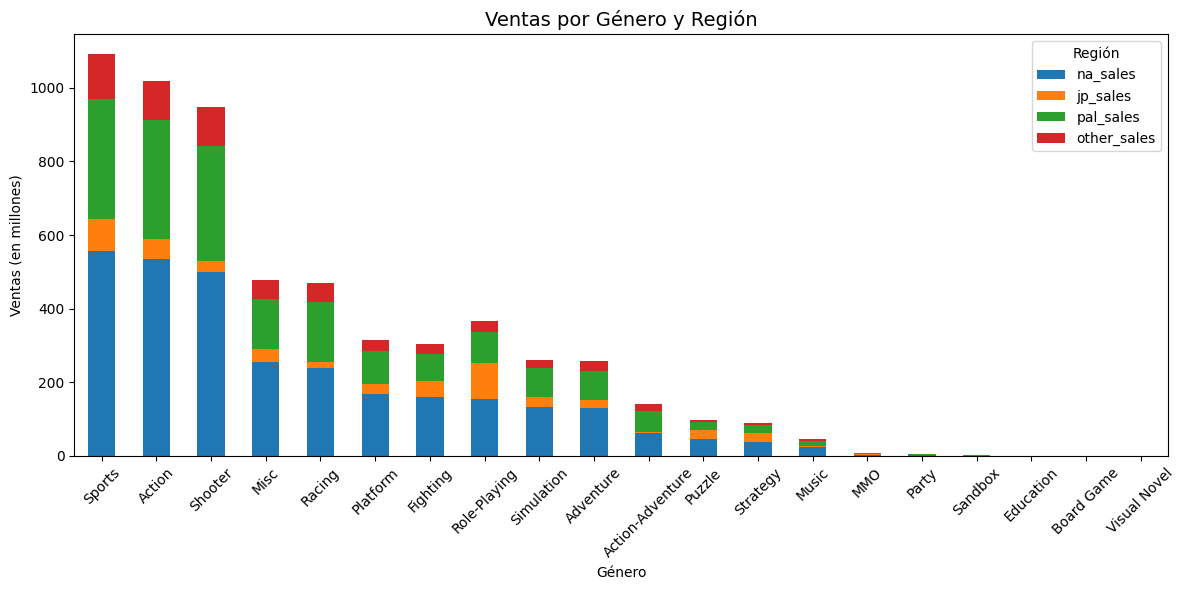

In [ ]:

# Agrupar las ventas por género y región
top_genres_sales = data_cleaned.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()
top_genres_sales = top_genres_sales.sort_values('na_sales', ascending=False)

# Gráfico de ventas por género y región
plt.figure(figsize=(12, 6))
top_genres_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Ventas por Género y Región', fontsize=14)
plt.ylabel('Ventas (en millones)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.legend(title='Región', loc='upper right')
plt.tight_layout()
plt.show()



### Interpretación:
La grafica muestra que los géneros más vendidos varían significativamente entre regiones. En Norteamérica, los géneros más populares son deportes, acción y shooter, destacando su predominio en este mercado con ventas superiores a 500 millones de unidades en cada caso. En Japón, los juegos de rol lideran con 130.56 millones de unidades, seguidos por deportes y acción, lo que refleja la preferencia del público japonés por experiencias narrativas y estratégicas. En Europa (PAL), deportes y acción también dominan, mientras que géneros como shooter y carreras tienen una fuerte presencia.


### Pregunta 2: ¿Existe una relación entre las puntuaciones críticas y las ventas totales?

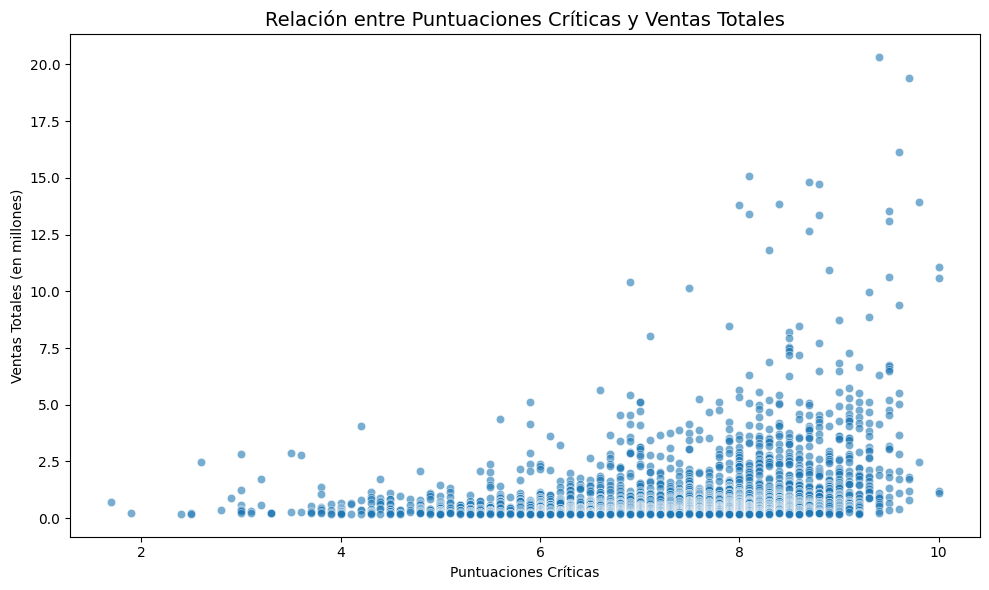

In [ ]:

# Gráfico de dispersión entre puntuaciones críticas y ventas totales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='critic_score', y='total_sales', alpha=0.6)
plt.title('Relación entre Puntuaciones Críticas y Ventas Totales', fontsize=14)
plt.xlabel('Puntuaciones Críticas')
plt.ylabel('Ventas Totales (en millones)')
plt.tight_layout()
plt.show()



### Interpretación:
la grafica revela una correlación positiva débil entre las puntuaciones críticas y las ventas totales, con un coeficiente de correlación de 0.28. Esto indica que, aunque los juegos con puntuaciones críticas más altas tienden a vender más, este no es el único factor determinante en el éxito comercial de un título.

La gráfica de dispersión muestra una gran dispersión de puntos, lo que refuerza la idea de que otros factores, como la popularidad de la franquicia, el marketing y las preferencias regionales, también influyen significativamente en las ventas.


### Pregunta 3: ¿Qué consolas tienen el promedio de ventas más alto?

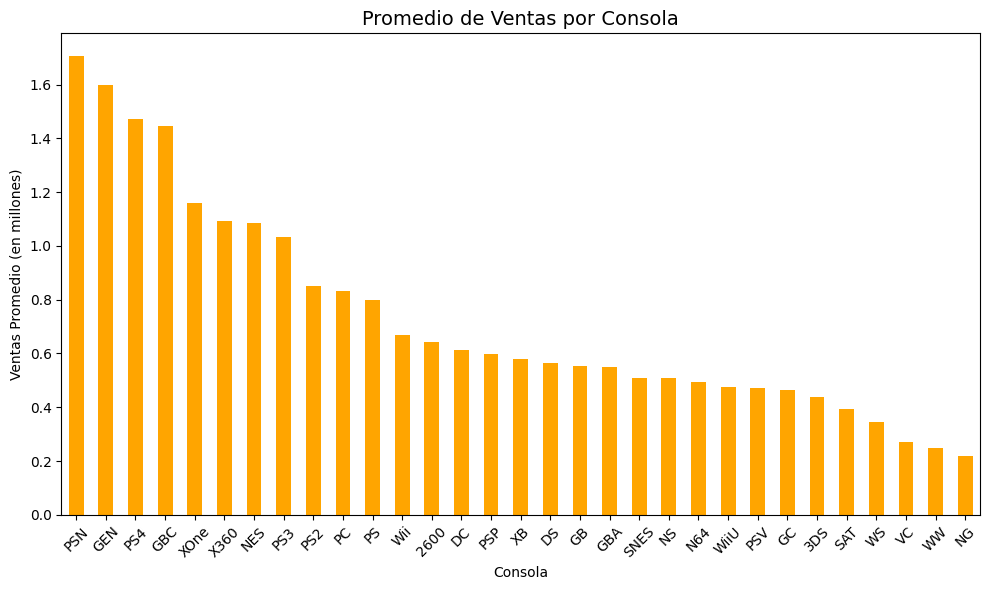

In [ ]:

# Calcular el promedio de ventas por consola
console_avg_sales = data_cleaned.groupby('console')['total_sales'].mean().sort_values(ascending=False)

# Gráfico de barras para el promedio de ventas por consola
console_avg_sales.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Promedio de Ventas por Consola', fontsize=14)
plt.ylabel('Ventas Promedio (en millones)')
plt.xlabel('Consola')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Interpretación:

la grafica muestra que el Game Boy Color lidera con un promedio de ventas de 1.45 millones de unidades por título, destacando su popularidad y el éxito de su catálogo de juegos. Le sigue la Nintendo Entertainment System, con un promedio de 0.99 millones por título, consolidándose como una de las consolas más influyentes en la historia de los videojuegos. Las consolas modernas, como la Xbox 360 y la PlayStation 3, también tienen promedios competitivos, lo que refleja su impacto durante su ciclo de vida. Por otro lado, consolas clásicas como el Atari 2600 y el Genesis mantienen promedios sólidos, demostrando su relevancia en los inicios de la industria. Consolas más recientes, como la Nintendo Switch y la PS Vita, muestran promedios más bajos, probablemente debido al enfoque en títulos digitales y la transición hacia nuevos modelos de distribución.

### Pregunta 4: ¿Cómo han cambiado las ventas a lo largo del tiempo?

<ipython-input-9-9363128ebe7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['year'] = data_cleaned['release_date'].dt.year


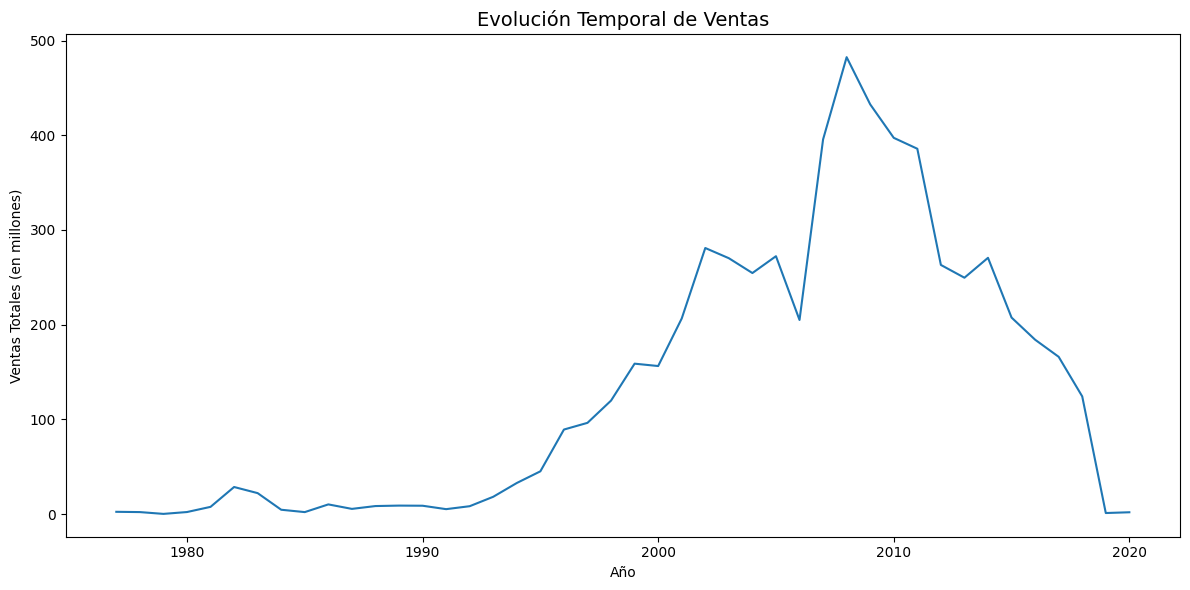

In [ ]:

# Extraer el año de la fecha de lanzamiento
data_cleaned['year'] = data_cleaned['release_date'].dt.year

# Agrupar las ventas totales por año
sales_over_time = data_cleaned.groupby('year')['total_sales'].sum()

# Gráfico de línea para la evolución de ventas en el tiempo
plt.figure(figsize=(12, 6))
sales_over_time.plot()
plt.title('Evolución Temporal de Ventas', fontsize=14)
plt.ylabel('Ventas Totales (en millones)')
plt.xlabel('Año')
plt.tight_layout()
plt.show()



### Interpretación:
El análisis de cómo han cambiado las ventas a lo largo del tiempo muestra un crecimiento inicial lento debido al mercado emergente y la menor cantidad de consolas y videojuegos disponibles. Esto cambió con la llegada de consolas icónicas como la NES y el Atari, que marcaron el inicio de un aumento constante en las ventas. Se observan picos importantes en ciertos años, asociados a lanzamientos de consolas exitosas como la PlayStation 2, Wii y Xbox 360, lo que demuestra la fuerte influencia del hardware en el mercado. Además, algunos años presentan incrementos excepcionales debido al lanzamiento de títulos exitosos dentro de franquicias populares como Grand Theft Auto y Call of Duty. En los años más recientes, las ventas muestran una ligera estabilidad o declive, posiblemente relacionado con la saturación del mercado, el auge de los juegos digitales o la falta de nuevos lanzamientos masivos de hardware.


### Pregunta 5: ¿Cuáles son los desarrolladores con mayor impacto en las ventas totales de videojuegos?

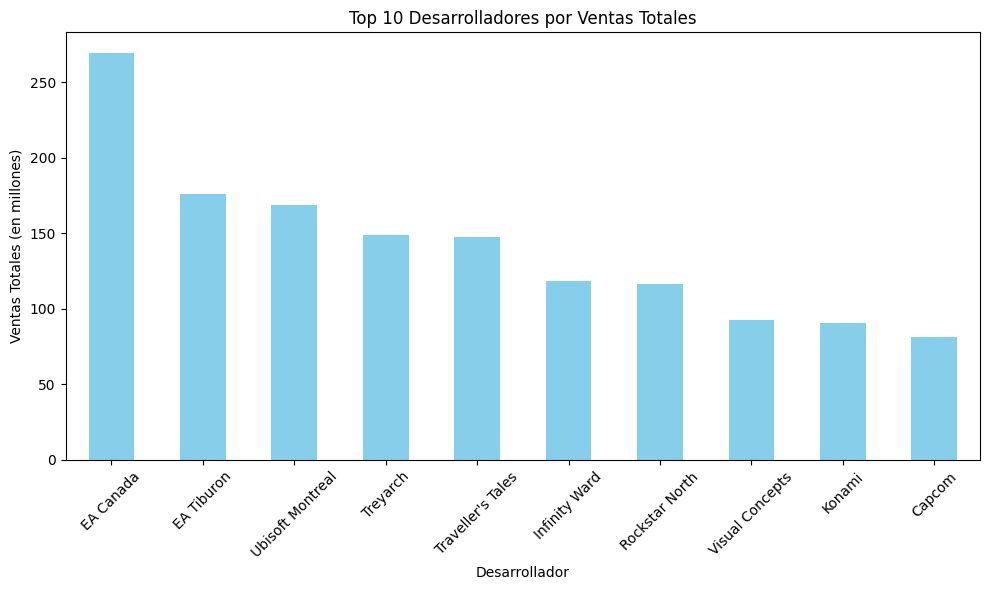

In [ ]:
top_developers = data_cleaned.groupby('developer')['total_sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_developers.plot(kind='bar', color='skyblue')
plt.title('Top 10 Desarrolladores por Ventas Totales')
plt.ylabel('Ventas Totales (en millones)')
plt.xlabel('Desarrollador')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Interpretación

EA Canada Es el desarrollador que más ventas totales registra, lo que refleja el éxito constante de sus títulos, probablemente debido a franquicias anuales como FIFA o NHL.

Ubisoft Montreal y Treyarch ocupan el segundo y tercer lugar estas empresas son conocidas por franquicias populares como Assassin's Creed y Call of Duty






### Pregunta 6: ¿Cómo varían las ventas promedio de videojuegos según la consola y el género?

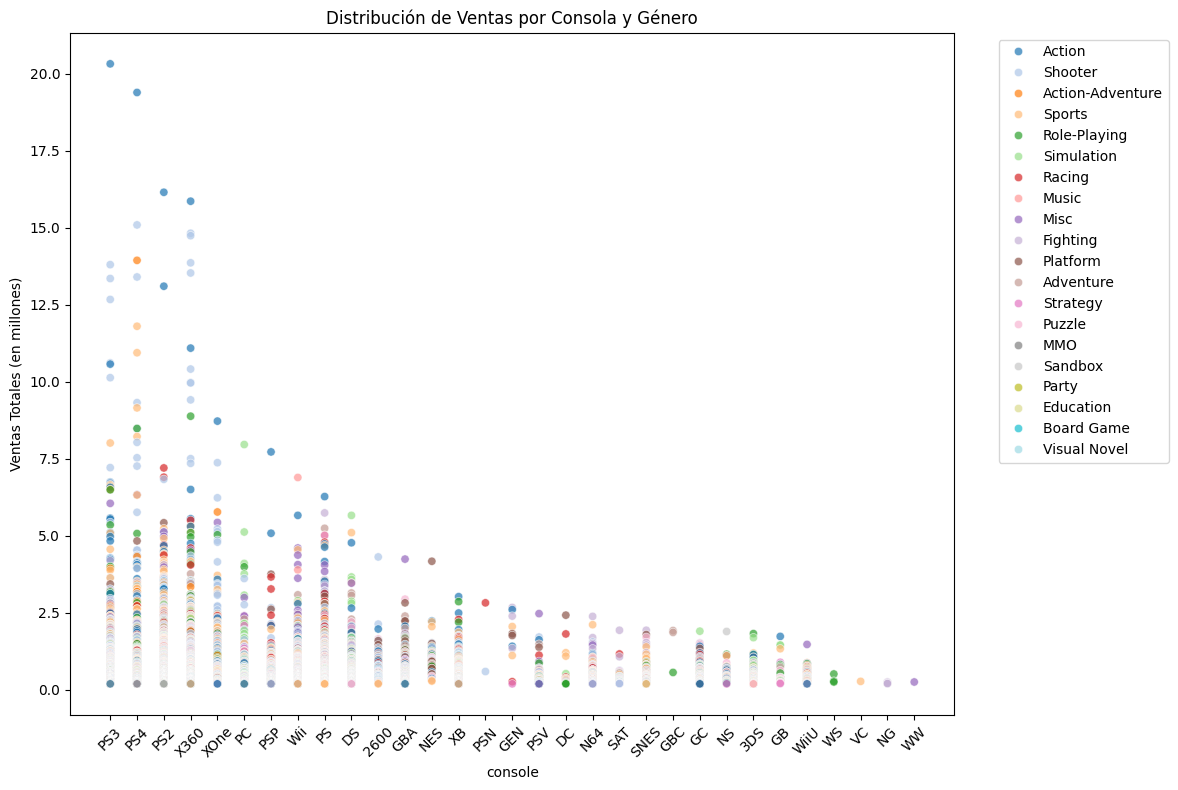

In [17]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='console', y='total_sales', hue='genre', data=data_cleaned, palette='tab20', alpha=0.7)
plt.title('Distribución de Ventas por Consola y Género')
plt.ylabel('Ventas Totales (en millones)')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.show()

### Interpretación

La gráfica muestra cómo las ventas promedio varían dependiendo de la consola y el género del videojuego. Se observa que las consolas clásicas, como el PS2 y el Wii, tienen altos promedios de ventas en géneros como acción y deportes, lo que refleja su popularidad durante su época de mayor auge. Por otro lado, consolas más recientes, como el PS4 y el Xbox One, presentan una mayor diversidad de géneros exitosos, destacando especialmente en shooter y role-playing.

Los géneros más populares, como acción y shooter, tienen ventas promedio altas en la mayoría de las consolas, lo que indica su atractivo universal entre los jugadores. Sin embargo, géneros más específicos, como puzzle o estrategia, tienen menores ventas promedio,


## Conclusiones Finales
1. Géneros Populares por Región: Los géneros más vendidos varían significativamente según la región. En Norteamérica, deportes, acción y shooter dominan el mercado, mientras que en Japón los juegos de rol lideran las ventas. Esto resalta cómo las preferencias culturales influyen en la demanda de ciertos géneros.

2. Relación entre Puntuaciones Críticas y Ventas: Existe una correlación positiva débil entre las puntuaciones críticas y las ventas totales, con un coeficiente de 0.28. Aunque una buena crítica puede mejorar el desempeño comercial de un título, otros factores como el marketing y la popularidad de la franquicia tienen un papel clave.

3. Desarrolladores Líderes: EA Canada lidera las ventas totales entre los desarrolladores, seguido de Ubisoft Montreal y Treyarch. Esto refleja el impacto de franquicias icónicas y la consistencia en la calidad de los títulos lanzados por estos estudios.

4. Ventas Promedio por Consola: Consolas clásicas como el Game Boy Color y la Nintendo Entertainment System tienen los promedios de ventas más altos por título, lo que subraya su éxito histórico. Sin embargo, consolas más recientes, como el PS4 y Xbox One, también muestran un desempeño sólido gracias a catálogos extensos y diversificados.

5. Tendencias Temporales en Ventas: Las ventas de videojuegos han seguido ciclos claros, con picos significativos asociados al lanzamiento de consolas exitosas y títulos estrella. En años recientes, se observa una ligera estabilización o declive, posiblemente debido a la saturación del mercado y el crecimiento de los juegos digitales.